# Analysis of the first mile

## Taking a look at the data 

In [1]:
import pandas as pd
import os

if 'multimodal' in os.getcwd():
    data_folder = '../../data/'
elif 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'ciclocidade_research/multimodal/'
destination_folder_path = data_folder + 'ciclocidade_research/multimodal/'

In [2]:
filename = 'OD_index.csv'
result_data = pd.read_csv(source_folder_path + filename, encoding= 'unicode_escape', sep = ';')

In [3]:
result_data

,ID_ORDEM,distancia_calculada,tempo_calculado,cod_estacao,nome_estacao,linha_estacao,cod_linha,cod_modo_acesso,modo_acesso
0,3,614,489.0,13,Se,Vermelha_metro,3,1,a_pe
1,4,696,541.0,82,Faria Lima,Amarela_viaquatro,4,1,a_pe
2,14,590,477.0,12,Pedro II,Vermelha_metro,3,1,a_pe
3,15,538,421.0,46,Sao Joaquim,Azul_metro,1,1,a_pe
4,16,590,477.0,12,Pedro II,Vermelha_metro,3,1,a_pe
...,...,...,...,...,...,...,...,...,...
14365,182396,650,509.0,83,Pinheiros,Amarela_viaquatro,4,1,a_pe
14366,182453,920,719.0,10,Bresser-Mooca,Vermelha_metro,3,1,a_pe
14367,182639,45,33.0,29,Alto Do Ipiranga,Verde_metro,2,1,a_pe
14368,182824,134,102.0,17,Marechal Deodoro,Vermelha_metro,3,1,a_pe


In [4]:
result_data['modo_acesso'].unique()

array(['a_pe', 'onibus', 'motorizado_individual', 'bicicleta'],
      dtype=object)

In [5]:
result_data['modo_acesso'].value_counts()

a_pe                     9611
onibus                   4381
motorizado_individual     365
bicicleta                  13
Name: modo_acesso, dtype: int64

In [6]:
for modo in result_data['modo_acesso'].unique():
    df_modo = result_data[result_data['modo_acesso'] == modo]
    print(f'modo {modo}'.format(modo = modo))
    perc = len(df_modo)/len(result_data)
    print(f'Percentage is {perc*100:.1f}%'.format(perc = perc))
    distance_mean = df_modo['distancia_calculada'].mean()
    print(f'Distance mean is {distance_mean}'.format(distance_mean = distance_mean))
    print()

modo a_pe
Percentage is 66.9%
Distance mean is 677.1675163874727

modo onibus
Percentage is 30.5%
Distance mean is 4238.443506048848

modo motorizado_individual
Percentage is 2.5%
Distance mean is 3194.4027397260274

modo bicicleta
Percentage is 0.1%
Distance mean is 2070.230769230769



In [7]:
od_data = pd.read_csv(data_folder + 'OD/OD_2017/OD_2017_v1.csv')

In [8]:
data = pd.merge(result_data, od_data, on='ID_ORDEM')
data

,ID_ORDEM,distancia_calculada,tempo_calculado,cod_estacao,nome_estacao,linha_estacao,cod_linha,cod_modo_acesso,modo_acesso,ZONA,...,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA
0,3,614,489.0,13,Se,Vermelha_metro,3,1,a_pe,1,...,50.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,6651.77
1,4,696,541.0,82,Faria Lima,Amarela_viaquatro,4,1,a_pe,1,...,60.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,4243.30
2,14,590,477.0,12,Pedro II,Vermelha_metro,3,1,a_pe,1,...,20.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1842.61
3,15,538,421.0,46,Sao Joaquim,Azul_metro,1,1,a_pe,1,...,20.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1842.61
4,16,590,477.0,12,Pedro II,Vermelha_metro,3,1,a_pe,1,...,15.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1877.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14365,182396,650,509.0,83,Pinheiros,Amarela_viaquatro,4,1,a_pe,516,...,90.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,21861.60
14366,182453,920,719.0,10,Bresser-Mooca,Vermelha_metro,3,1,a_pe,516,...,120.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,30075.44
14367,182639,45,33.0,29,Alto Do Ipiranga,Verde_metro,2,1,a_pe,516,...,90.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,27092.11
14368,182824,134,102.0,17,Marechal Deodoro,Vermelha_metro,3,1,a_pe,517,...,150.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,35585.15


## Group of people that goes on foot

In [9]:
on_foot = data[data['modo_acesso'] == 'a_pe']

In [10]:
import seaborn as sns
def plot_histogram(hist_data, binwidth = 100, title = ''):
    ax = sns.histplot(data=hist_data, stat='percent',binwidth=binwidth)
    for i in ax.containers:
        print(i)
        ax.bar_label(i,fmt='%.1f')
    ax.set(title=title)
# plt.savefig(data_folder + 'charts/histograms/age_after_covid.png')

<BarContainer object of 1 artists>
<BarContainer object of 15 artists>


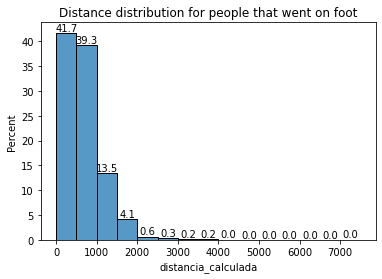

In [11]:
plot_histogram(on_foot['distancia_calculada'], 500, 'Distance distribution for people that went on foot')

<BarContainer object of 1 artists>
<BarContainer object of 8 artists>


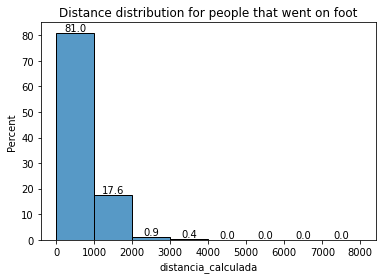

In [12]:
plot_histogram(on_foot['distancia_calculada'], 1000, 'Distance distribution for people that went on foot')

<BarContainer object of 1 artists>
<BarContainer object of 4 artists>


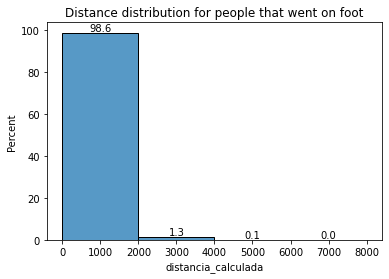

In [13]:
plot_histogram(on_foot['distancia_calculada'], 2000, 'Distance distribution for people that went on foot')

In [14]:
len(on_foot)

9611

In [15]:
number_long_walk = len(on_foot[on_foot['distancia_calculada'] > 2500])
print("Number of people that walk for more than 30 minutes (2.5 km): " + str(number_long_walk))
print("Percentage of people that walk for more than 30 minutes (2.5 km): " + str(round((number_long_walk*100)/len(on_foot),2))+ "%")

Number of people that walk for more than 30 minutes (2.5 km): 76
Percentage of people that walk for more than 30 minutes (2.5 km): 0.79%


In [16]:
number_long_walk = len(on_foot[on_foot['distancia_calculada'] > 1700])
print("Number of people that walk for more than 20 minutes (1.7 km): " + str(number_long_walk))
print("Percentage of people that walk for more than 20 minutes (1.7 km): " + str(round((number_long_walk*100)/len(on_foot),2))+ "%")

Number of people that walk for more than 20 minutes (1.7 km): 292
Percentage of people that walk for more than 20 minutes (1.7 km): 3.04%


## Social classes

#### Classes code used in the 'CRITERIOBR' column

1 - A

2 - B1

3 - B2

4 - C1

5 - C2

6 -  D - E


In [17]:
classes = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}

In [18]:
data['CRITERIOBR'].value_counts()

3.0    4937
4.0    3240
2.0    2126
5.0    1682
1.0    1660
6.0     424
Name: CRITERIOBR, dtype: int64

In [19]:
data['CRITERIOBR'].unique()

array([ 4.,  5.,  3.,  6.,  2., nan,  1.])

In [20]:
#percentage of null values
data['CRITERIOBR'].isnull().sum()/len(data['CRITERIOBR'])

0.020946416144746

In [21]:
# Replace null values with -1
data['CRITERIOBR'] = data['CRITERIOBR'].fillna(-1)

In [22]:
data[data['CRITERIOBR'] == '1.0'].value_counts()

Series([], dtype: int64)

In [23]:
data[data['CRITERIOBR'].astype(int) == 1]

,ID_ORDEM,distancia_calculada,tempo_calculado,cod_estacao,nome_estacao,linha_estacao,cod_linha,cod_modo_acesso,modo_acesso,ZONA,...,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA
157,848,850,660.0,14,Anhangabau,Vermelha_metro,3,1,a_pe,4,...,90.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14675.21
198,1165,438,362.0,15,Republica,Vermelha_metro,3,1,a_pe,5,...,22.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4653.46
199,1166,251,188.0,85,Fradique Coutinho,Amarela_viaquatro,4,1,a_pe,5,...,22.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4653.46
200,1167,438,362.0,15,Republica,Vermelha_metro,3,1,a_pe,5,...,20.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1302.81
201,1168,383,318.0,43,Sao Bento,Azul_metro,1,1,a_pe,5,...,20.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1302.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14310,179217,129,96.0,86,Higienopolis-Mackenzie,Amarela_viaquatro,4,1,a_pe,507,...,55.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,22326.04
14313,179402,635,500.0,43,Sao Bento,Azul_metro,1,1,a_pe,507,...,105.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,24206.44
14328,180971,537,430.0,15,Republica,Vermelha_metro,3,1,a_pe,513,...,120.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,34453.00
14329,181091,46,34.0,23,Trianon-Masp,Verde_metro,2,1,a_pe,513,...,120.0,1.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,31376.41


In [24]:
data['CRITERIOBR'] = data['CRITERIOBR'].astype(int)

In [25]:
import matplotlib.pyplot as plt

def plot_pie(data, title = '', y_label = ''):
    fig = plt.figure(figsize=(3,3), dpi=200)
    fig.patch.set_facecolor('white')

    ax = plt.subplot(111)

    data.value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=6)


    # data_plot = data['QT_AUTO'][data['CRITERIOBR'].astype(int) == i].value_axs()
    # # plt.pie(data_plot, ax=axes[r,c], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
    # data_plot.plot(ax=axes[r,c], kind='pie', autopct='%1.0f%%', fontsize = 15)
    ax.set_title(title, fontsize = 10)
    if y_label != '':
        ax.set_ylabel(y_label, fontsize = 10)

In [26]:
data['CRITERIOBR_names'] = data['CRITERIOBR'].replace(classes)

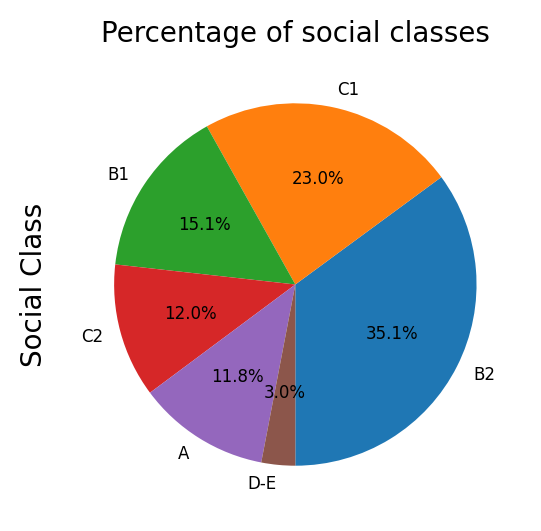

In [27]:
# Plot, removing null values
plot_pie(data['CRITERIOBR_names'].where(data['CRITERIOBR_names'] != -1), title = "Percentage of social classes", y_label = 'Social Class')

In [28]:
#percentage of null values
data['QT_AUTO'].isnull().sum()/len(data['QT_AUTO'])

0.020668058455114824

In [29]:
# Replace null values with -1
data['QT_AUTO'] = data['QT_AUTO'].fillna(-1)

In [30]:
#percentage of null values
data['QT_AUTO'].isnull().sum()/len(data['QT_AUTO'])

0.0

In [31]:
data['QT_AUTO'] = data['QT_AUTO'].astype(int)

In [32]:
data_filter = data['QT_AUTO'][data['CRITERIOBR'].astype(int) == 1]
data_plot = data_filter.value_counts()
data_plot.values

array([750, 620, 154,  85,  43,   8])

In [33]:
import matplotlib.pyplot as plt

labels_dict = {'QT_AUTO': 'Number of automobiles',
               'QT_BICICLE': 'Number of bicycles'}

color_dict = {'True': 'lightcoral',
           'False': 'yellowgreen'}

colors_list = ['sandybrown', 'limegreen', 'cornflowerblue','hotpink', 'darkorchid']

def plot_pie_chart(ax, i, variable, boolean_variable = False):
    data_filter = data[variable][data['CRITERIOBR'].astype(int) == i]
    data_plot = data_filter.value_counts()
    if boolean_variable:
        if data_filter.value_counts()[True] > data_filter.value_counts()[False]:
            first = 'True'
            second = 'False'
        else:
            first = 'False'
            second = 'True'
        
        colors=[color_dict.get(first), color_dict.get(second)]
    else:
        colors=colors_list
    # plt.pie(data_plot, ax=axes[r,c], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
    # data_plot.plot(ax=ax, kind='pie', autopct='%1.1f%%', startangle=270,fontsize = 15)
    if boolean_variable:
        data_plot.plot(ax=ax, kind='pie', autopct='%1.1f%%', startangle=0,fontsize = 15, colors=colors)
    else:
        data_plot.plot(ax=ax, kind='pie', startangle=0,fontsize = 15, colors=colors)
    ax.set_title('Class ' + classes[int(i)] +
                            ': ' + str(round(len(data_filter)*100/len(data),1)) + '%', fontsize = 15)
    # ax.set_ylabel(labels_dict[variable], fontsize = 18)
    ax.set_ylabel("")
    if not boolean_variable:
        legend_plot = [perc + "%" for perc in ((data_plot.values*100/len(data_filter)).round(2)).astype('str')]
        ax.legend(legend_plot, loc='center left', bbox_to_anchor = (0., 0.4))
    return ax

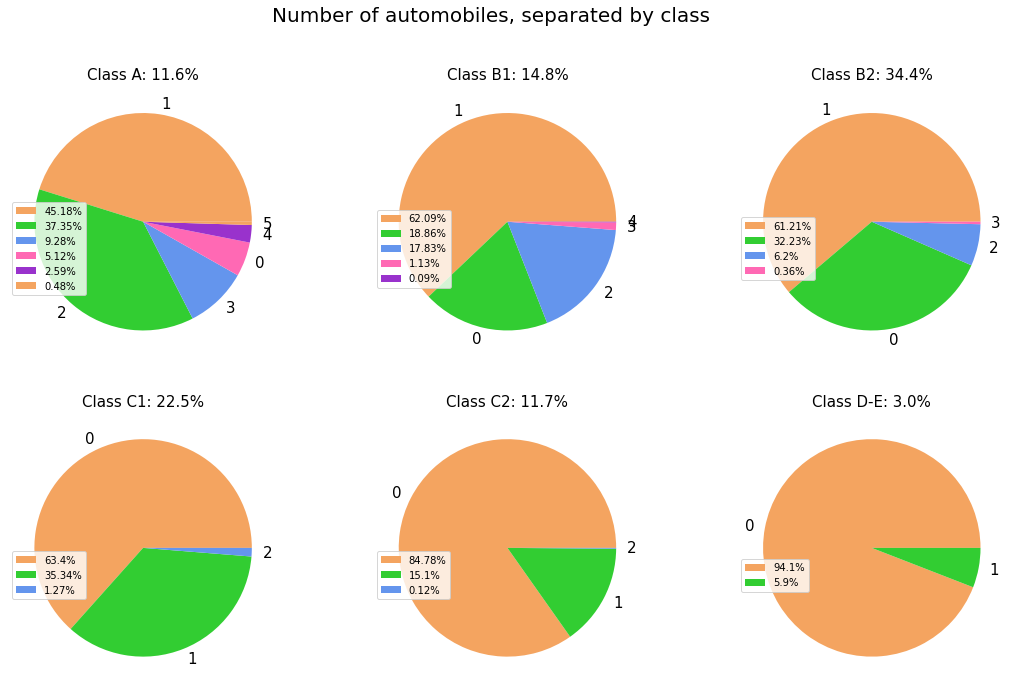

In [34]:
#define number of rows and columns for subplots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
nrow=2
ncol=3

fig, axes = plt.subplots(nrow, ncol)

fig.patch.set_facecolor('white')
fig.set_size_inches(18.5, 11)

fig.suptitle('Number of automobiles, separated by class', fontsize = 20)

# key of social class
i = 1

for r in range(nrow):
    for c in range(ncol):
        axes[r,c] = plot_pie_chart(axes[r,c], i, 'QT_AUTO')
        i+=1

In [35]:
data['HAS_AUTO'] = data['QT_AUTO'] >= 1

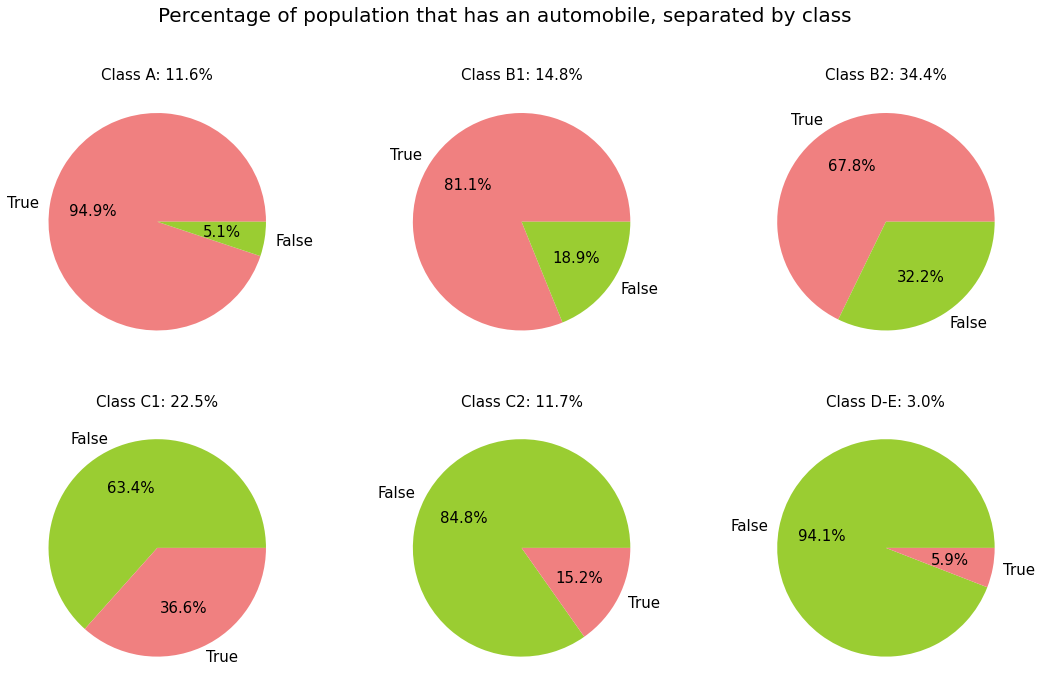

In [36]:
#define number of rows and columns for subplots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
nrow=2
ncol=3

fig, axes = plt.subplots(nrow, ncol)

fig.patch.set_facecolor('white')
fig.set_size_inches(18.5, 11)
fig.suptitle('Percentage of population that has an automobile, separated by class', fontsize = 20)

i = 1

for r in range(nrow):
    for c in range(ncol):
        axes[r,c] = plot_pie_chart(axes[r,c], i, 'HAS_AUTO', boolean_variable=True)
        i+=1


In [37]:
data['HAS_BIKE'] = data['QT_BICICLE'] >= 1

In [38]:
data['HAS_BIKE'].value_counts()

False    9870
True     4500
Name: HAS_BIKE, dtype: int64

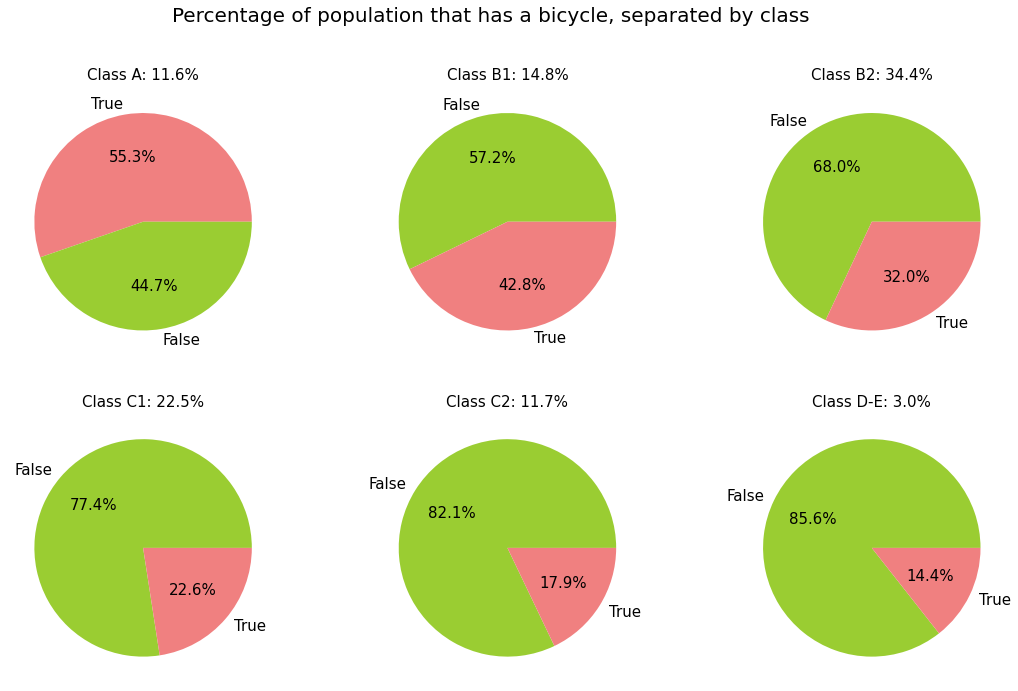

In [39]:
#define number of rows and columns for subplots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
nrow=2
ncol=3

fig, axes = plt.subplots(nrow, ncol)

fig.patch.set_facecolor('white')
fig.set_size_inches(18.5, 11)
fig.suptitle('Percentage of population that has a bicycle, separated by class', fontsize = 20)

i = 1

for r in range(nrow):
    for c in range(ncol):
        axes[r,c] = plot_pie_chart(axes[r,c], i, 'HAS_BIKE', boolean_variable=True)
        i+=1


In [40]:
data['modo_acesso'].unique()

array(['a_pe', 'onibus', 'motorizado_individual', 'bicicleta'],
      dtype=object)

In [41]:
data['WENT_BY_AUTO'] = data['modo_acesso'] == 'motorizado_individual'

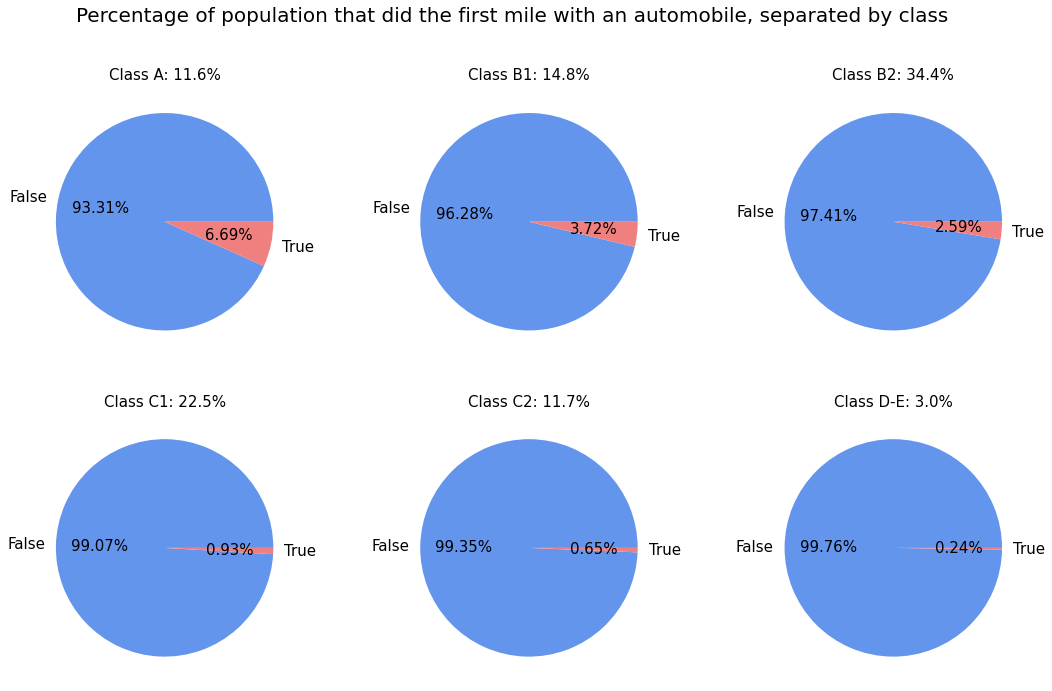

In [42]:
#define number of rows and columns for subplots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
nrow=2
ncol=3

fig, axes = plt.subplots(nrow, ncol)

fig.patch.set_facecolor('white')
fig.set_size_inches(18.5, 11)
fig.suptitle('Percentage of population that did the first mile with an automobile, separated by class', fontsize = 20)
labels = ['True', 'False']
color_dict = {'True': 'lightcoral',
           'False': 'cornflowerblue'}

count = 1

for r in range(nrow):
    for c in range(ncol):
        data_class = data['WENT_BY_AUTO'][data['CRITERIOBR'].astype(int) == count]
        data_plot = data_class.value_counts()
        if data_class.value_counts()[True] > data_class.value_counts()[False]:
            first = 'True'
            second = 'False'
        else:
            first = 'False'
            second = 'True'
        
        colors=[color_dict.get(first), color_dict.get(second)]
        # '%1.0f%%'    %.2f
        data_plot.plot(ax=axes[r,c], kind='pie', autopct='%.2f%%', fontsize = 15,
                       colors=colors)
        
        axes[r,c].set_title('Class ' + classes[int(count)] +
                            ': ' + str(round(len(data_class)*100/len(data),1)) + '%', fontsize = 15)
        axes[r,c].set_ylabel('Went by automobile', fontsize = 18, labelpad = 30)
        axes[r,c].set(ylabel=None)
        count+=1


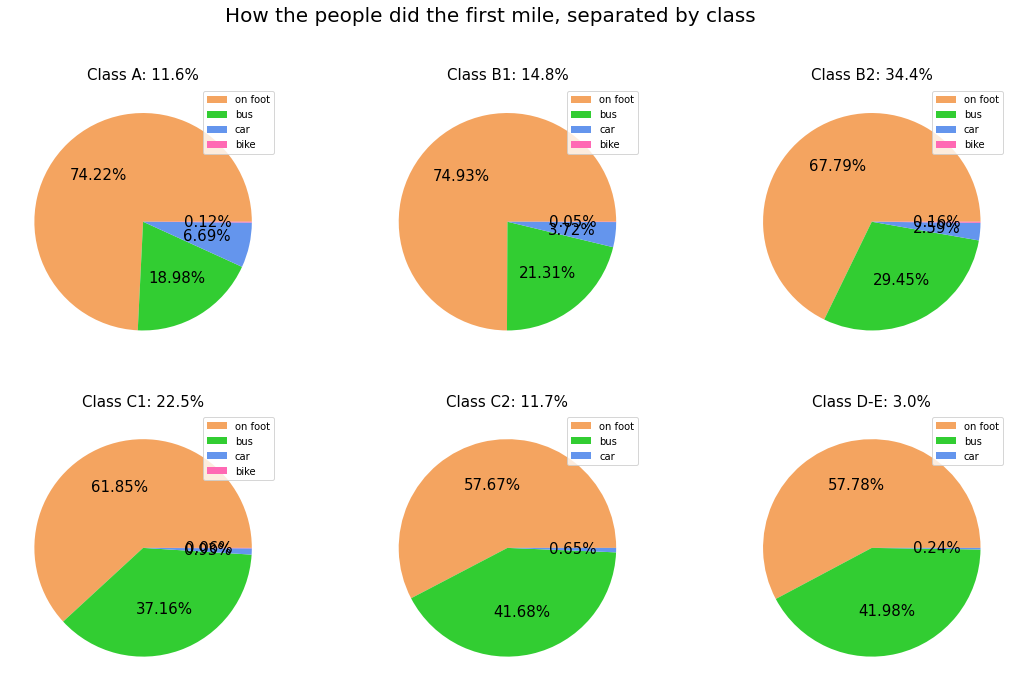

In [43]:
#define number of rows and columns for subplots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
nrow=2
ncol=3

fig, axes = plt.subplots(nrow, ncol)

fig.patch.set_facecolor('white')
fig.set_size_inches(18.5, 11)
fig.suptitle('How the people did the first mile, separated by class', fontsize = 20)
labels = ['True', 'False']
color_dict = {'True': 'lightcoral',
           'False': 'cornflowerblue'}

count = 1

for r in range(nrow):
    for c in range(ncol):
        data_class = data['modo_acesso'][data['CRITERIOBR'].astype(int) == count]
        data_plot = data_class.value_counts()

        colors = ['sandybrown', 'limegreen', 'cornflowerblue','hotpink', 'darkorchid']
            
        data_plot.plot(ax=axes[r,c], labels = None, kind='pie', autopct='%1.2f%%', fontsize = 15,
                       colors = colors)
        
        axes[r,c].set_title('Class ' + classes[int(count)] +
                            ': ' + str(round(len(data_class)*100/len(data),1)) + '%', fontsize = 15)
        axes[r,c].set_ylabel('Went by automobile', fontsize = 18, labelpad = 30)
        axes[r,c].legend(["on foot", "bus", "car", 'bike'],loc="upper right")
        # axes[r,c].legend(loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=8)
        axes[r,c].set(ylabel=None)
        count+=1


In [44]:
type(data_class.value_counts())

pandas.core.series.Series

In [45]:
df = pd.DataFrame(data_class.value_counts())
df.index

Index(['a_pe', 'onibus', 'motorizado_individual'], dtype='object')

In [46]:
data['QT_AUTO'][data['CRITERIOBR'].astype(int) == list(classes.keys())[0]].value_counts()

1    750
2    620
3    154
0     85
4     43
5      8
Name: QT_AUTO, dtype: int64

### Excluding bike and on foot modes of transportation

In [47]:
data['modo_acesso'].unique()

array(['a_pe', 'onibus', 'motorizado_individual', 'bicicleta'],
      dtype=object)

In [48]:
data_motorized = data[(data['modo_acesso'] == 'onibus') | (data['modo_acesso'] == 'motorizado_individual')]
data_motorized['modo_acesso'] = data_motorized['modo_acesso'].replace({'onibus': 'bus', 'motorizado_individual': 'car'})

<ipython-input-48-f8b2c3e15368>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_motorized['modo_acesso'] = data_motorized['modo_acesso'].replace({'onibus': 'bus', 'motorizado_individual': 'car'})


In [49]:
data_motorized['modo_acesso'].value_counts()

bus    4381
car     365
Name: modo_acesso, dtype: int64

In [50]:
data_motorized

,ID_ORDEM,distancia_calculada,tempo_calculado,cod_estacao,nome_estacao,linha_estacao,cod_linha,cod_modo_acesso,modo_acesso,ZONA,...,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA,CRITERIOBR_names,HAS_AUTO,HAS_BIKE,WENT_BY_AUTO
15,56,2124,2236.0,35,Parada Inglesa,Azul_metro,1,2,bus,1,...,NaN,NaN,NaN,NaN,NaN,11033.83,B2,True,True,False
16,58,7788,4637.0,14,Anhangabau,Vermelha_metro,3,2,bus,1,...,NaN,NaN,NaN,NaN,NaN,12735.61,B2,True,True,False
24,101,1989,490.0,37,Santana,Azul_metro,1,3,car,1,...,NaN,NaN,NaN,NaN,NaN,7387.62,B2,True,False,True
36,132,2159,2250.0,84,Butanta,Amarela_viaquatro,4,2,bus,1,...,NaN,NaN,NaN,NaN,NaN,9843.29,C2,False,False,False
55,229,2491,2144.0,3,Patriarca,Vermelha_metro,3,2,bus,1,...,NaN,NaN,NaN,NaN,NaN,15579.20,C1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14204,175108,4952,NaN,34,Tucuruvi,Azul_metro,1,2,bus,497,...,NaN,NaN,NaN,NaN,NaN,24677.90,B2,False,True,False
14228,175932,5754,NaN,176,Vila Clarice,Rubi_cptm,7,2,bus,499,...,NaN,NaN,NaN,NaN,NaN,12773.44,C2,False,False,False
14258,177249,4975,NaN,138,Imperatriz Leopoldina,Diamante_cptm,8,2,bus,501,...,NaN,NaN,NaN,NaN,NaN,13075.12,B2,True,False,False
14307,179110,6928,NaN,140,Itaim Paulista,Safira_cptm,12,2,bus,507,...,NaN,NaN,NaN,NaN,NaN,50943.36,C2,False,False,False


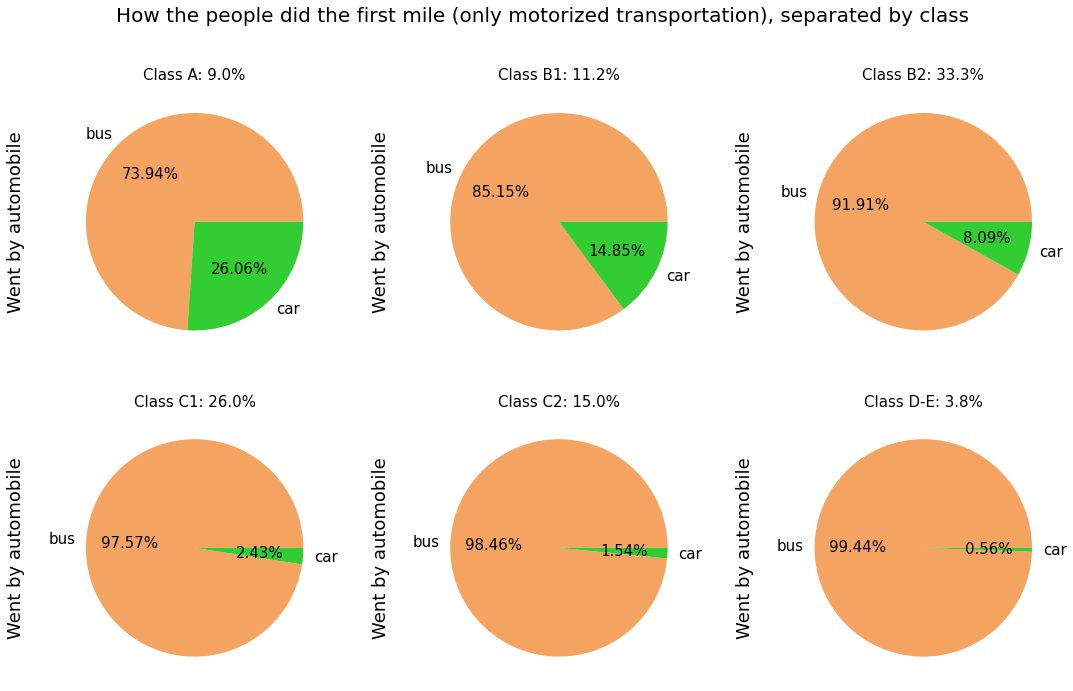

In [51]:
#define number of rows and columns for subplots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
nrow=2
ncol=3

fig, axes = plt.subplots(nrow, ncol)

fig.patch.set_facecolor('white')
fig.set_size_inches(18.5, 11)
fig.suptitle('How the people did the first mile (only motorized transportation), separated by class', fontsize = 20)
labels = ['True', 'False']
color_dict = {'True': 'lightcoral',
           'False': 'cornflowerblue'}

count = 1

for r in range(nrow):
    for c in range(ncol):
        data_class = data_motorized['modo_acesso'][data_motorized['CRITERIOBR'].astype(int) == count]
        data_plot = data_class.value_counts()

        colors = ['sandybrown', 'limegreen', 'cornflowerblue','hotpink', 'darkorchid']
            
        data_plot.plot(ax=axes[r,c], kind='pie', autopct='%1.2f%%', fontsize = 15,
                       colors = colors)
        
        axes[r,c].set_title('Class ' + classes[int(count)] +
                            ': ' + str(round(len(data_class)*100/len(data_motorized),1)) + '%', fontsize = 15)
        axes[r,c].set_ylabel('Went by automobile', fontsize = 18, labelpad = 30)
        # axes[r,c].legend(["on foot", "bus", "car", 'bike'],loc="upper right")
        # axes[r,c].legend(loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=8)
        # axes[r,c].set(ylabel=None)
        count+=1

## To do: plot in flows map (bikescience) all the flows of the first mile. THe percentile, etc...

## Also, calculate the cycling potential

## To do these, I have the coordinates



Variables that can be useful:

ZONA_O - Zona de Origem <br>
MUNI_O - Município de Origem<br>
CO_O_X - Coordenada X Origem<br>
CO_O_Y - Coordenada Y Origem<br>


ZONA_T1 - Zona da 1ª Transferência<br>
MUNI_T1 - Município 1ª Transferência<br>
CO_T1_X - Coordenada X 1ª Transferência<br>
CO_T1_Y - Coordenada Y 1ª Transferência<br>
